In [4]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data.csv', header = 1)
data.head()

,CODE,PROVINCE,AREA,NAME OF FACILITY,ADDRESS,EMAIL,TELEPHONE,GRADE,EMPL,CAP,ROOMS
0,AIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AIR 0009,Mat North,Victoria Falls,Wilderness Air Zimbabwe Pvt Ltd,Ronald Brian Goatley - 366 Gibson Road – P O B...,tours@wilderness.co.zw,08328 43371/3,NaN,18,6,NaN
2,AIR 0010,Harare,Harare,Halsteds AviationCorporation,Mark Symthe - No 2 Mount Pleasant Road Avondal...,herbert@haczim.com,"0778 491 276,0242 302 353",NaN,NaN,103,NaN
3,AIR 0011,Harare,Harare,Fastjet Zimbabwe Limited,Farai Mutamangira & Craig John William -1st Fl...,faraichikuni@fastjet.com,09 882894,NaN,82,100,NaN
4,BED AND BREAKFAST ACCOMMODATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.dropna()  # Drop rows with any missing values

data = data.drop_duplicates()  # Drop duplicate rows

data = data.sort_values(['AREA', 'GRADE', 'EMPL', 'ROOMS']) 

data = data.reset_index(drop=True)

In [7]:
selected_columns = ['AREA', 'GRADE', 'EMPL', 'ROOMS']
data = data[selected_columns]
data.head()

,AREA,GRADE,EMPL,ROOMS
0,Beitbridge,Comfort,7,16
1,Beitbridge,Luxury,24,22
2,Beitbridge,No Star Rating,48,35
3,Beitbridge,No Star Rating,6,24
4,Beitbridge,Standard,10,20


In [8]:
sentiment_categories = {
    'Positive': ['5 Star', '4 Star', '3 Star', 'Five Star', 'Four Star', 'Three Star', 'Luxury', 'Comfort', 'Comfort 3 str'],
    'Neutral': ['Standard', 'Not Yet Graded', 'No Rating', 'Not yet Graded'],
    'Negative': ['No Star', '1 Star','2 Star','No Star Rating', 'One Star', 'Two Star', 'Standard (Two Star)', 'No Star', 'Standard(2 Star', 'Two Star Standard']
}

In [9]:
data['SENTIMENT'] = data['GRADE'].apply(lambda x: next((k for k, v in sentiment_categories.items() if x in v), None))

In [10]:
label_encoder = LabelEncoder()
data['SENTIMENT_CODE'] = label_encoder.fit_transform(data['SENTIMENT'])

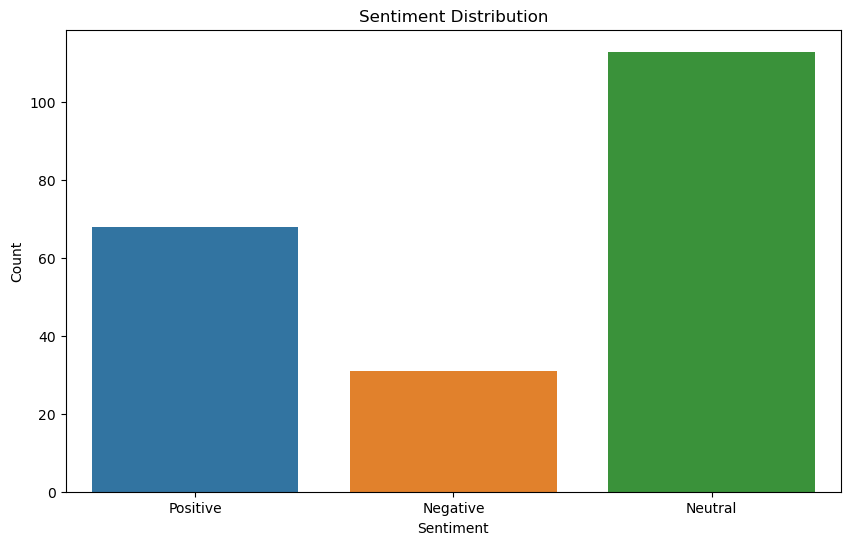

In [11]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='SENTIMENT', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_19720/284139487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[['EMPL', 'ROOMS']] = data_subset[['EMPL', 'ROOMS']].fillna(np.nan)


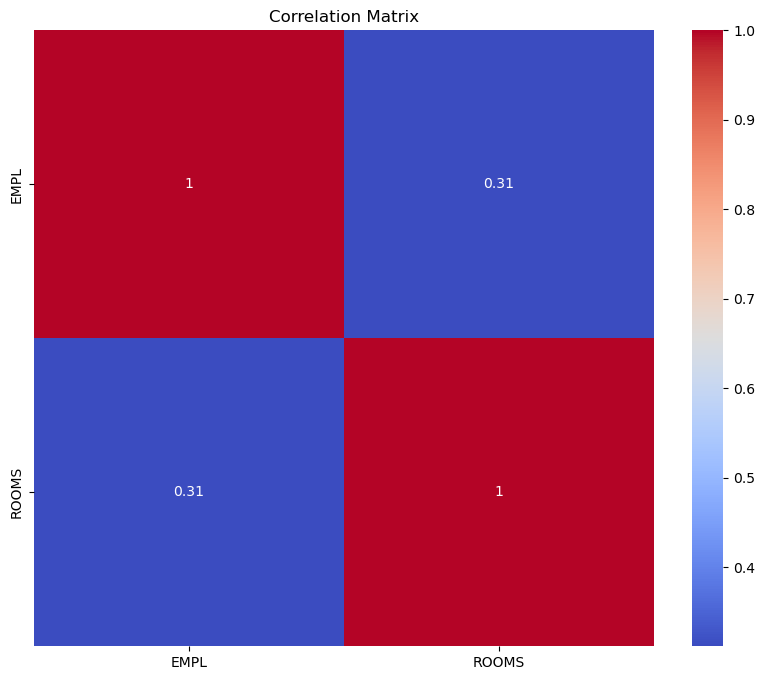

In [12]:
# Correlation analysis
import numpy as np

data_subset = data[pd.to_numeric(data['EMPL'], errors='coerce').notnull() & pd.to_numeric(data['ROOMS'], errors='coerce').notnull()]

correlation_matrix = data_subset[['EMPL', 'ROOMS']].corr()

data_subset[['EMPL', 'ROOMS']] = data_subset[['EMPL', 'ROOMS']].fillna(np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
data

,AREA,GRADE,EMPL,ROOMS,SENTIMENT,SENTIMENT_CODE
0,Beitbridge,Comfort,7,16,None,3
1,Beitbridge,Luxury,24,22,Positive,2
2,Beitbridge,No Star Rating,48,35,Negative,0
3,Beitbridge,No Star Rating,6,24,Negative,0
4,Beitbridge,Standard,10,20,Neutral,1
...,...,...,...,...,...,...
234,Victoria Falls,Standard,21,12,Neutral,1
235,Victoria Falls,Standard,36,5,Neutral,1
236,Victoria Falls,Standard,4,12,Neutral,1
237,Victoria Falls,Standard,4,4,Neutral,1


In [14]:
features = data[['AREA', 'GRADE', 'EMPL', 'ROOMS']]
target = data['SENTIMENT_CODE']

In [15]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

features_encoded = pd.get_dummies(features)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

In [17]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

/home/akim/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3954 - loss: 1.3477 - val_accuracy: 0.6042 - val_loss: 1.2700
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6007 - loss: 1.2104 - val_accuracy: 0.5625 - val_loss: 1.1713
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5422 - loss: 1.1178 - val_accuracy: 0.5625 - val_loss: 1.0775
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6142 - loss: 0.9921 - val_accuracy: 0.6250 - val_loss: 0.9870
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6274 - loss: 0.9207 - val_accuracy: 0.7292 - val_loss: 0.8961
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6873 - loss: 0.8257 - val_accuracy: 0.7708 - val_loss: 0.8041
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7813 - loss: 0.6410 - val_accuracy: 0.7708 - val_loss: 0.7129
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7920 - loss: 0.5735 - val_accuracy: 0.7708 - val_loss: 0.6276
Epoch 9

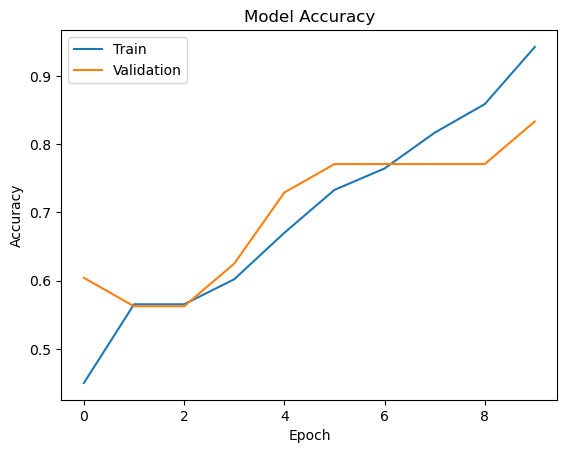

In [20]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

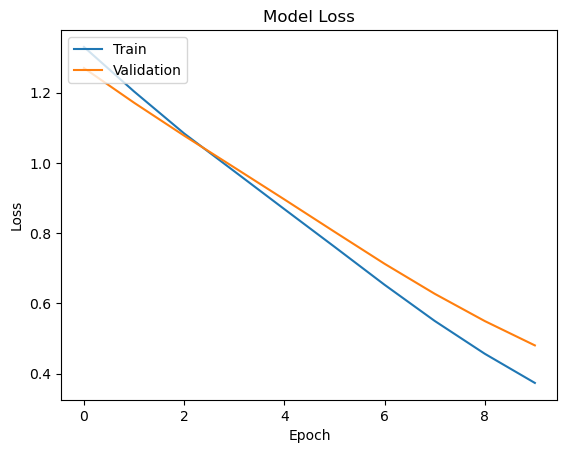

In [21]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()